# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.shape
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_ELEM',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#remove all rows with "NaN" for AVG_READING_4_SCORE
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
#use "STATE" to organize rows
df_ = df.set_index("STATE")

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [4]:
print(len(df.groupby("YEAR")))

14


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
total_mi = 0.0;
for year_score in df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"]:
    total_mi += year_score
avg_mi = total_mi / len(df.groupby("YEAR"))

total_oh = 0.0
for year_score in df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"]:
    total_oh += year_score
avg_oh = total_oh / len(df.groupby("YEAR"))

if avg_mi > avg_oh:
    print("MICHIGAN")
elif avg_mi < avg_oh:
    print("OHIO")
else:
    print("EQUAL")

MICHIGAN


Find the average for your outcome score across all states in 2019

In [6]:
df_ = df.set_index("STATE")
df_2019 = df_[df_["YEAR"] == 2019]
df_2019.loc["NATIONAL"][["YEAR", "AVG_READING_4_SCORE"]]

YEAR                    2019
AVG_READING_4_SCORE    220.0
Name: NATIONAL, dtype: object

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [100]:
state_max = {}
df.head()
states = []
for idx in range(len(df)):
    year = df.iloc[idx]
    if year["STATE"] not in state_max:
        state_max[year["STATE"]] = year["AVG_READING_4_SCORE"]
    else:
        if  year["AVG_READING_4_SCORE"] > state_max[year["STATE"]]:
            state_max[year["STATE"]] = year["AVG_READING_4_SCORE"]
sorted_states = sorted(state_max, key=lambda k:state_max[k], reverse=True)
for state in sorted_states:
    print(state, state_max[state])

MASSACHUSETTS 237.0
DODEA 235.0
NEW_JERSEY 233.0
MARYLAND 232.0
NEW_HAMPSHIRE 232.0
CONNECTICUT 230.0
VERMONT 230.0
VIRGINIA 229.0
FLORIDA 228.0
KENTUCKY 228.0
WYOMING 228.0
COLORADO 227.0
MINNESOTA 227.0
MONTANA 227.0
INDIANA 227.0
NEBRASKA 227.0
PENNSYLVANIA 227.0
DELAWARE 226.0
MAINE 226.0
NORTH_CAROLINA 226.0
UTAH 226.0
WASHINGTON 226.0
NORTH_DAKOTA 226.0
OHIO 226.0
KANSAS 225.0
RHODE_ISLAND 225.0
IOWA 225.0
MISSOURI 224.0
NEW_YORK 224.0
WISCONSIN 223.0
IDAHO 223.0
SOUTH_DAKOTA 223.0
NATIONAL 223.0
GEORGIA 222.0
OKLAHOMA 222.0
ILLINOIS 222.0
ALABAMA 220.0
OREGON 220.0
TENNESSEE 220.0
TEXAS 220.0
MICHIGAN 220.0
ARKANSAS 219.0
MISSISSIPPI 219.0
WEST_VIRGINIA 219.0
HAWAII 218.0
NEVADA 218.0
SOUTH_CAROLINA 218.0
ARIZONA 216.0
CALIFORNIA 216.0
LOUISIANA 216.0
DISTRICT_OF_COLUMBIA 214.0
ALASKA 214.0
NEW_MEXICO 212.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)
df["READING_DEV"] = df["AVG_READING_8_SCORE"] - df["AVG_READING_4_SCORE"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_ELEM,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,READING_DEV
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0,44.0
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0,54.0
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0,47.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,50.0
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0,44.0


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I created a new column that will track development in average reading scores, calculating the difference between average reading scores for 8th graders and average reading scores for 4th graders across each state. This should better show the caliber of the education systems in each state, as this is a more accurate measure of what students have learned rather than what they may already know. While this data should technically be offset by four years, I imagine that the averages for states would remain fairly constant over that kind of time window, and I lack the technical ability to resolve this discrepancy.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_READING_8_SCORE', ylabel='AVG_READING_4_SCORE'>

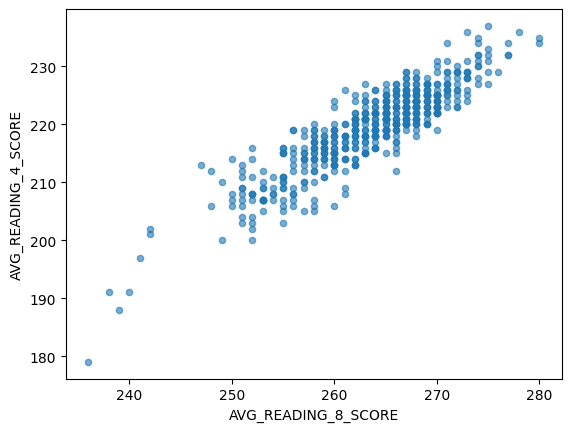

In [9]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)

**<CAPTION FOR VIZ 1>**
This shows a fairly strong positive correlation between the average reading scores of 4th and 8th graders. This data says that good readers in 4th grade will be good readers in 8th grade, and that baseline reading ability is an important factor in this study.

**Visualization 2**

<Axes: xlabel='READING_DEV', ylabel='AVG_READING_4_SCORE'>

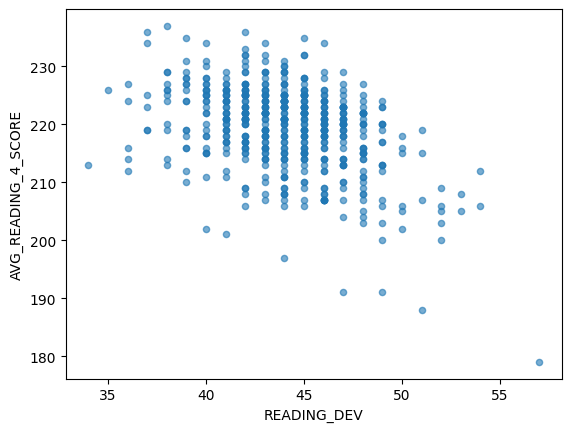

In [10]:
df.plot.scatter(x='READING_DEV', y='AVG_READING_4_SCORE', alpha=0.6)

**<CAPTION FOR VIZ 2>**
This shows a weak negative correlation between reading development and average reading scores for 4th graders, suggesting that baseline ability is more important than instruction received when it comes to developing your reading skills.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [78]:
X = df[['ENROLL_4','INSTRUCTION_EXPENDITURE','AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [79]:
y.fillna(y.median(), inplace=True)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [81]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [82]:
# create your model here
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

In [84]:
print(model.intercept_)
print(model.coef_)

-30.640396512916055
[-1.19593698e-05  1.51904532e-07  5.02133776e-01  4.94509703e-01]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [85]:
#R-squared = 0.825, indicates good fit
model.score(X_test, y_test)

0.8252770283498647

In [86]:
#mean error = -0.011, low value indicates good fit
np.mean(model.predict(X_test)-y_test)

-0.11153349245801351

In [87]:
#root mean squared error = 2.9, large value indicates outliers
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.8963812748662083

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

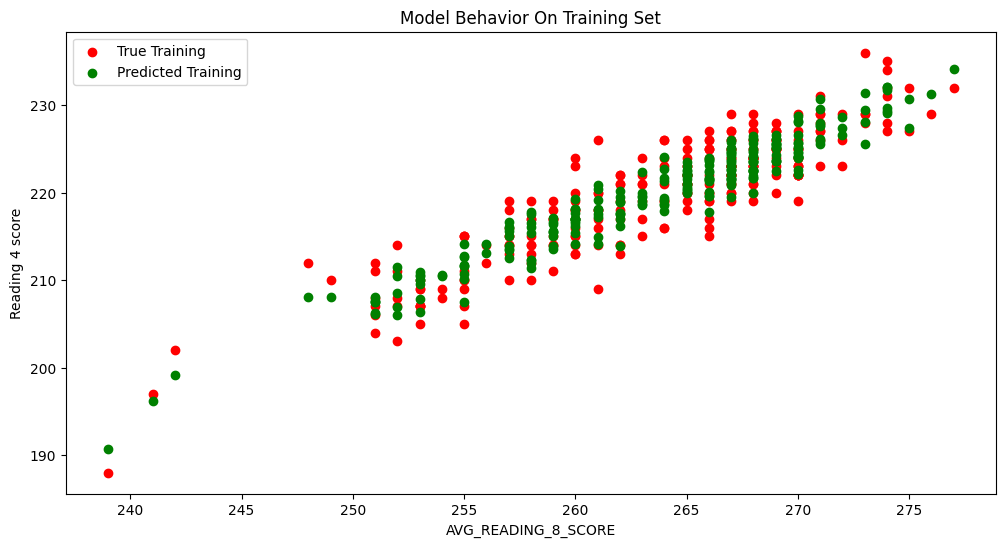

In [88]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

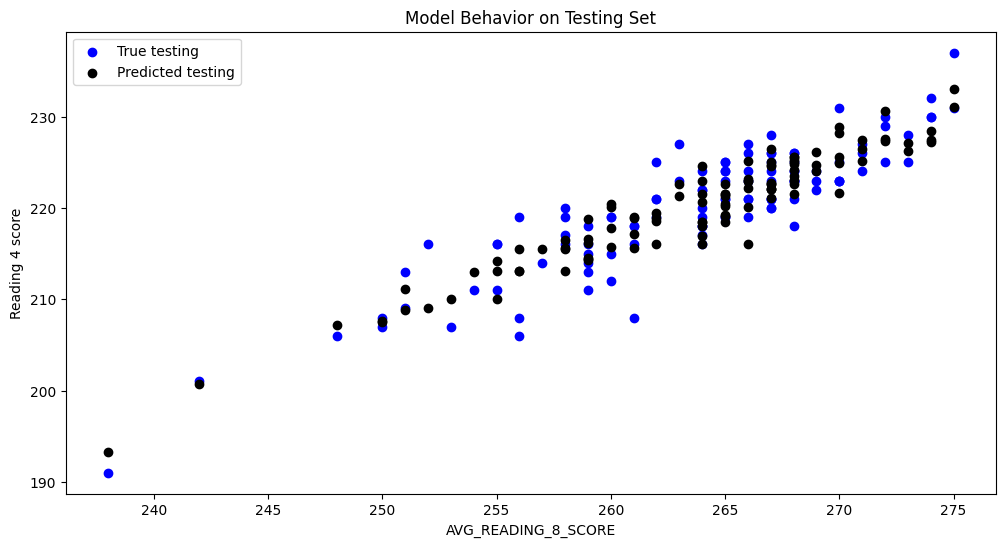

In [89]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**




In [101]:
'''

For this checkpoint, I chose to investigate average reading scores of 4th graders. I felt that this would be interesting to compare with the
results achieved by 8th graders in the tutorial's data analysis. During this study, I calculated that Michigan's average score was higher
than Ohio's, and that the average reading score obtained by a 4th grader in the U.S. was 220. After this, I used a dictionary to output all 
states and their highest average 4th grade reading score that they obtained over the course of the study, sorted from highest to lowest.
I then created a new column, READING_DEV, to analyze the growth of a state's average reader from 4th grade to 8th, with a positive correlation
showing the impact of teaching and a negative correlation the impact of individual ability. I created scatterplots to visualize these trends,
confirming the negative association. Finally, for the machine learning introduction, I analyzed that same question of 4th graders versus 8th
graders, getting some fairly strong correlations between the true and projected data. This indicates a successful model, showing that average
reading scores of 8th graders are a good predictor for the average reading scores of 4th graders from the same state.

'''

"\n\nFor this checkpoint, I chose to investigate average reading scores of 4th graders. I felt that this would be interesting to compare with the\nresults achieved by 8th graders in the tutorial's data analysis. During this study, I calculated that Michigan's average score was higher\nthan Ohio's, and that the average reading score obtained by a 4th grader in the U.S. was 220. After this, I used a dictionary to output all \nstates and their highest average 4th grade reading score that they obtained over the course of the study, sorted from highest to lowest.\nI then created a new column, READING_DEV, to analyze the growth of a state's average reader from 4th grade to 8th, with a positive correlation\nshowing the impact of teaching and a negative correlation the impact of individual ability. I created scatterplots to visualize these trends,\nconfirming the negative association. Finally, for the machine learning introduction, I analyzed that same question of 4th graders versus 8th\ngrade